# Excercise 1

Import useful python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Import the GAMERA library. If the path is not added to the PYTHONPATH in your `~/.bashrc`, use the `sys.path.append` as follows:

In [2]:
import sys
sys.path.append('/home/depaoli/Software/ASTRO/GAMERA/lib/')
import gappa as gp

## Particle Spectra
First step is to define arbitrary particle spectra.

Let's define a logparabola and a power-law as example spectra. 

Both of them are defined at a reference energy



In [ ]:
# define reference energy as 1 TeV
e_ref = gp.TeV_to_erg

### Power Law Spectrum
1. **Energy Range Definition**:
   - The energy range of the particles (total energy) is defined between 1 GeV and 1 PeV (logspaced)
   - These energy values are then converted to ergs using the `gp.TeV_to_erg` conversion factor.

In [4]:
energy_in_erg_pl = np.logspace(-3, 3, 200) * gp.TeV_to_erg


2. **Spectral Parameters**:
   - The spectral index ($\alpha$) and the total energy ($e_{\text{total}}$) in particles are defined.


In [5]:
alpha_pl = 2
e_total_pl = 1e49  # erg

3. **Power-Law Definition**:
   - A power-law spectrum is created using the defined energy range and spectral index.

In [6]:
power_law = energy_in_erg_pl ** -alpha_pl

4. **Normalization**:
   - The power-law spectrum is normalized to the total energy $ e_{\text{total}} $ using the `Integrator` from the `Utils` class.
   - The `Integrate` method integrates the product of energy and power-law spectrum over the energy range.
   - The spectrum is then scaled by the ratio of $ e_{\text{total}} $ to the integral value to ensure the total energy matches $ e_{\text{total}} $.

In [7]:
fu = gp.Utils()
power_law *= e_total_pl / fu.Integrate(list(zip(energy_in_erg_pl, power_law * energy_in_erg_pl)))

5. **Formatting the Spectrum**:
   - The energy values and the normalized power-law spectrum are combined into a 2D list using the `zip` function and converted to a NumPy array.

In [8]:
power_law_spectrum = np.array(list(zip(energy_in_erg_pl, power_law)))

### Logparabola spectrum

1. **Energy Range Definition**:
   - The energy range of the particles (total energy) is defined between $10^{-5}$ TeV and $10^3$ TeV (logspaced)
   - These energy values are then converted to ergs using the `gp.TeV_to_erg` conversion factor.

In [9]:
energy_in_erg_logpar = np.logspace(-5, 3, 200) * gp.TeV_to_erg

2. **Spectral Parameters**:
   - The spectral index ($\alpha_{\text{logpar}}$), curvature ($\beta_{\text{logpar}}$), and the total energy ($e_{\text{total}}$) are defined.


In [10]:
alpha_logpar = 2.3
beta_logpar = 0.3
e_total_logpar = 1e46  # erg

3. **Log-Parabola Definition**:
   - The log-parabola spectrum is then calculated using the defined energy range, spectral index, and curvature.

In [11]:
logparabola = (energy_in_erg_logpar / e_ref) ** -(alpha_logpar + beta_logpar * np.log10((energy_in_erg_logpar / e_ref)))

4. **Normalization**:
   - The log-parabola spectrum is normalized to the total energy $e_{\text{total}}$ using the `Integrator` from the `Utils` class.
   - The `Integrate` method integrates the product of energy and log-parabola spectrum over the energy range.
   - The spectrum is then scaled by the ratio of $e_{\text{total}}$ to the integral value to ensure the total energy matches $e_{\text{total}}$.

In [12]:
fu = gp.Utils()
logparabola *= e_total_logpar / fu.Integrate(list(zip(energy_in_erg_logpar, energy_in_erg_logpar * logparabola)))

5. **Formatting the Spectrum**:
   - The energy values and the normalized log-parabola spectrum are combined into a 2D list using the `zip` function and converted to a NumPy array.


In [13]:
logparabola_spectrum = np.array(list(zip(energy_in_erg_logpar, logparabola)))

### Particle Spectra Plot

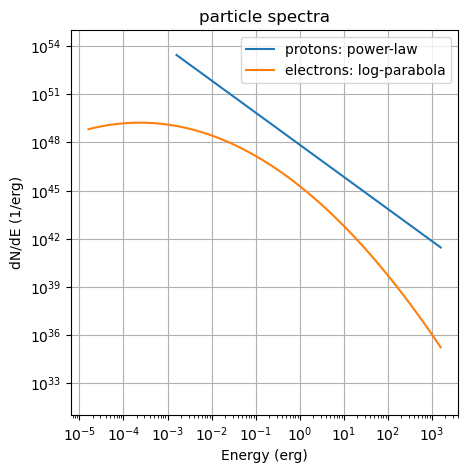

In [14]:
# particle spectra plot
f,ax = plt.subplots(figsize=(5,5))
plt.loglog(power_law_spectrum[:,0],power_law_spectrum[:,1],label="protons: power-law")
plt.loglog(logparabola_spectrum[:,0],logparabola_spectrum[:,1],label="electrons: log-parabola")
plt.xlabel("Energy (erg)")
plt.ylabel("dN/dE (1/erg)")
plt.ylim(ymin=1e31,ymax=1e55)
plt.legend()
plt.title("particle spectra")
plt.grid()

## Evaluate Spectral Energy Distribution (SED)

The `eval_sed` function calculates the spectral energy distribution (SED) for a given set of physical conditions. Here are the key steps involved in this process:

1. **Function Parameters**:
   - `b_field`: Magnetic field strength in Gauss.
   - `ambient_density`: Ambient density in particles per cubic centimeter.
   - `t_cmb`: Temperature of the Cosmic Microwave Background (CMB).
   - `edens_cmb`: Energy density of the CMB in erg.
   - `distance`: Distance to the source in parsecs. If zero, photon production rate instead of flux will be calculated

2. **Photon Production Rate Calculation**:
   - A `Radiation` object is created and set up with the given parameters.
   - The ambient density and magnetic field are set.
   - Thermal target photons from the CMB are added.
   - The distance to the source is set.

3. **Particle Type Definition**:
   - The particle type is defined to determine which radiation processes will be calculated.
   - Both protons and electrons spectra are set using the previously defined `power_law_spectrum` and `logparabola_spectrum`.

4. **Gamma-Ray Emission Calculation**:
   - The function defines the energy range for which gamma-ray emission should be calculated.
   - The differential photon spectrum is calculated for this energy range.

5. **Extracting SED Components**:
   - The total SED and individual components (proton-proton interactions, synchrotron radiation, bremsstrahlung, and inverse Compton scattering) are extracted.
   - These SEDs are converted into numpy arrays for convenient use.

6. **Return Values**:
   - The function returns the total SED and the individual components as numpy arrays.

In [15]:
def eval_sed(
        b_field = 1e-5, # Gauss
        ambient_density = 1, # 1/cm^3
        t_cmb = 2.7,
        edens_cmb = 0.25 * gp.eV_to_erg, # erg
        distance = 1e3, 
):
    """
    Evaluate the spectral energy distribution (SED) for given physical conditions.

    Parameters
    ----------
    b_field : float, optional
        Magnetic field strength in Gauss. Default is 1e-5 Gauss.
    ambient_density : float, optional
        Ambient density in particles per cubic centimeter. Default is 1 1/cm^3.
    t_cmb : float, optional
        Temperature of the Cosmic Microwave Background (CMB) in Kelvin. Default is 2.7 K.
    edens_cmb : float, optional
        Energy density of the CMB in erg. Default is 0.25 * gp.eV_to_erg erg.
    distance : float, optional
        Distance to the source in parsecs. Default is 1e3 parsecs.

    Returns
    -------
    tuple: 
        Total SED, proton-proton SED, synchrotron SED, bremsstrahlung SED, 
        and inverse Compton SED as numpy arrays. Each array contains the SED
        (E^2 dN/dE in erg/s/cm^2) versus energy (in TeV).
    """
    # Create a Radiation object and set it up
    fr = gp.Radiation()
    fr.SetAmbientDensity(ambient_density)
    fr.SetBField(b_field)
    fr.AddThermalTargetPhotons(t_cmb,edens_cmb)
    fr.SetDistance(distance)
    # Define the particle type; this will determine which radiation processes
    # will be calculated.
    fr.SetProtons(power_law_spectrum)
    fr.SetElectrons(logparabola_spectrum)
    # Calculate the flux at an arbitrary range of gamma-ray energies (in erg)
    # define energies at which gamma-ray emission should be calculated 
    e = np.logspace(-6,15,200) * gp.eV_to_erg
    # Do the calculation
    fr.CalculateDifferentialPhotonSpectrum(e)
    # Extract the different SEDs
    total_sed = fr.GetTotalSED() # SED, E^2dNdE (erg/s/cm^2) vs E (TeV)
    pp_sed = fr.GetPPSED() 
    synch_sed = fr.GetSynchrotronSED() 
    brems_sed = fr.GetBremsstrahlungSED()
    ic_sed = fr.GetICSED()
    # in order to conveniently use them with numpy, transpose to numpy arrays
    total_sed = np.array(total_sed)
    pp_sed = np.array(pp_sed)
    synch_sed = np.array(synch_sed)
    brems_sed = np.array(brems_sed)
    ic_sed = np.array(ic_sed)
    return total_sed, pp_sed, synch_sed, brems_sed, ic_sed

To test how it works, let's evaluate using the default values:

In [16]:
total_sed, pp_sed, synch_sed, brems_sed, ic_sed = eval_sed()

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



And let's make some plots

Text(0.5, 1.0, 'Radiation SEDs')

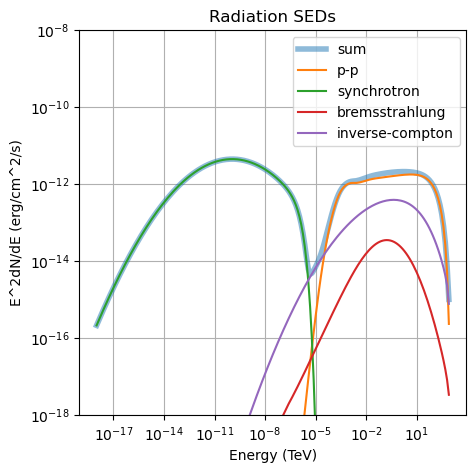

In [17]:
f,ax = plt.subplots(figsize=(5,5))
plt.loglog(total_sed[:,0],total_sed[:,1],lw=4,alpha=0.5,label="sum")
plt.loglog(pp_sed[:,0],pp_sed[:,1],label="p-p")
plt.loglog(synch_sed[:,0],synch_sed[:,1],label="synchrotron")
plt.loglog(brems_sed[:,0],brems_sed[:,1],label="bremsstrahlung")
plt.loglog(ic_sed[:,0],ic_sed[:,1],label="inverse-compton")
plt.xlabel("Energy (TeV)")
plt.ylabel("E^2dN/dE (erg/cm^2/s)")
plt.ylim(ymin=1e-18,ymax=1e-8)
plt.legend()
plt.grid()
plt.title("Radiation SEDs")

### Play around changing some paramenters

Now we calculate the SED for a range of magnetic field strengths and ambient densities

In [18]:
total_sed_dict = {}
for b_ in np.logspace(-5,-3,3):
    total_sed_dict[b_] = {}
    for dens_ in [0.1,1,10]:
        res_ = eval_sed(b_field=b_,ambient_density=dens_)
        total_sed_dict[b_][dens_] = res_[0]

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculatedalculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    200 / 200 points calculatedted
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray em

And we plot the results

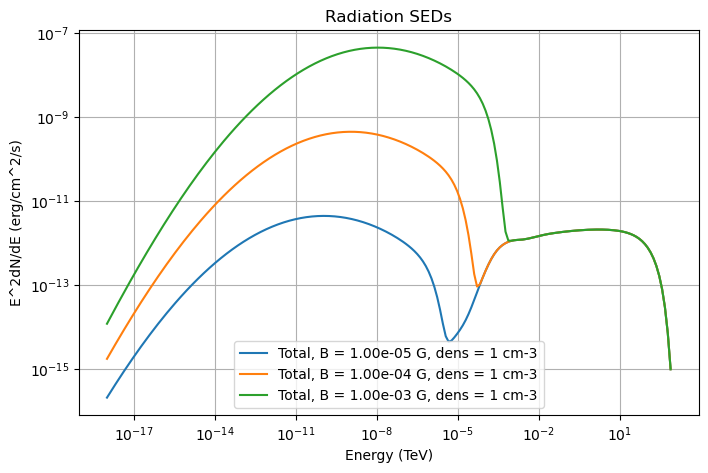

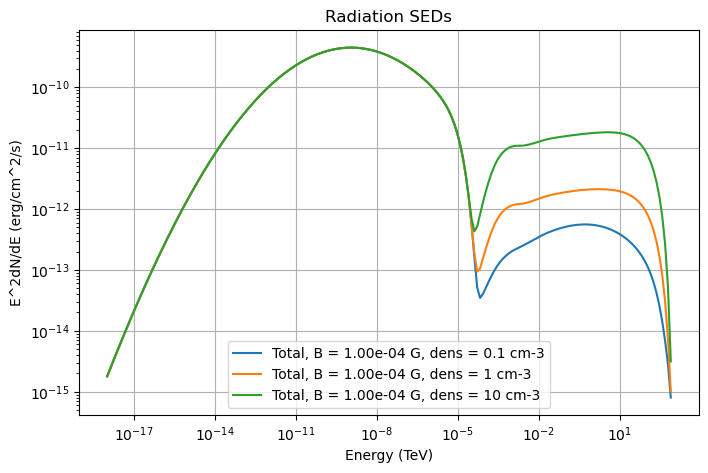

In [19]:
f,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')
dens_ = 1
for b_ in total_sed_dict.keys():
    plt.plot(total_sed_dict[b_][dens_][:,0],total_sed_dict[b_][dens_][:,1],label=f"Total, B = {b_:.2e} G, dens = {dens_} cm-3")
    plt.xlabel("Energy (TeV)")
    plt.ylabel("E^2dN/dE (erg/cm^2/s)")
    # plt.ylim(ymin=1e-18,ymax=1e-8)
    plt.legend()
    plt.grid()
    plt.title("Radiation SEDs")
f,ax = plt.subplots(figsize=(8,5))
ax.set_xscale('log')
ax.set_yscale('log')
b_ = 1e-4
for dens_ in total_sed_dict[b_].keys():
    plt.plot(total_sed_dict[b_][dens_][:,0],total_sed_dict[b_][dens_][:,1],label=f"Total, B = {b_:.2e} G, dens = {dens_} cm-3")
    plt.xlabel("Energy (TeV)")
    plt.ylabel("E^2dN/dE (erg/cm^2/s)")
    # plt.ylim(ymin=1e-18,ymax=1e-8)
    plt.legend()
    plt.grid()
    plt.title("Radiation SEDs")
